In [ ]:
"I choose to do the exercise created by powerpuff pigerne and professor utonium"
"Link here: """"This is the exercise we chose: https://github.com/SebastianBentley/Python_Exercise7/blob/main/README.md""""

In [26]:
import bs4
import requests

#Go to this website: https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop
r = requests.get('https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop')
r.raise_for_status()

In [27]:
#Use BeautifulSoup, to select the name and price for the laptops (hint: look for "product-list-container" to begin with).
#Save the data, to be used for later.

soup = bs4.BeautifulSoup(r.text, 'html.parser')
model = soup.select('span[class="table-cell"]')
full_name = soup.findAll("a", {"class":"product-name"})
prices = soup.select('div[class="product-price"]')
lst_models = []
lst_prices = []


for idx, val in enumerate(names):
    lst_models.append(model[idx].getText())
    lst_prices.append(prices[idx].getText())

both = dict(zip(lst_models, lst_prices))

In [28]:
# Using Regular Expressions and the data from Exercise 1, find all laptops with the brand Asus.
import re
regex = re.compile(r'(asus).([\w\-]+)')
asus_all = regex.findall(str(full_name))

print('All Asus: {}'.format(asus_all))

All Asus: [('asus', 'tuf-gaming-a15-fx506-15-6-gaming-computer-sort'), ('asus', 'rog-strix-g153qr-15-6-barbar-gaming-computer-gra'), ('asus', 'tuf-gaming-a15-fx506-15-6-barbar-gaming-computer'), ('asus', 'tuf-gaming-a17-fa706qm-17-3-barbar-gaming-computer-gra'), ('asus', 'zenbook-pro-15-ux535-15-6-barbar-computer-i7165121650tifhd'), ('asus', 'tuf-gaming-a17-fx706ii-h7048t-17-3-barbar-gaming-computer-gra'), ('asus', 'tuf-gaming-a15-fa506-15-6-barbar-computer-r585121660t')]


In [31]:
#Use Selenium to click on the most expensive Asus laptop, then find and print its graphics card, using BeautifulSoup.
from time import sleep


print("Starting...")

browser = webdriver.Chrome(executable_path="/Users/frederikdahl/chromedriver/chromedriver")


browser.get("https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop")

browser.implicitly_wait(3)

sleep(3) 
button = browser.find_element_by_xpath('//*[@id="coiPage-1"]/div[2]/button[2]')
button.click()

sleep(3)
r2 = requests.get(browser.current_url)
r.raise_for_status()
soup2 = bs4.BeautifulSoup(r2.text, 'html.parser')
price2 = soup.select('div[class="product-price-container"]')

print(price2)


browser.quit()

Starting...
[]


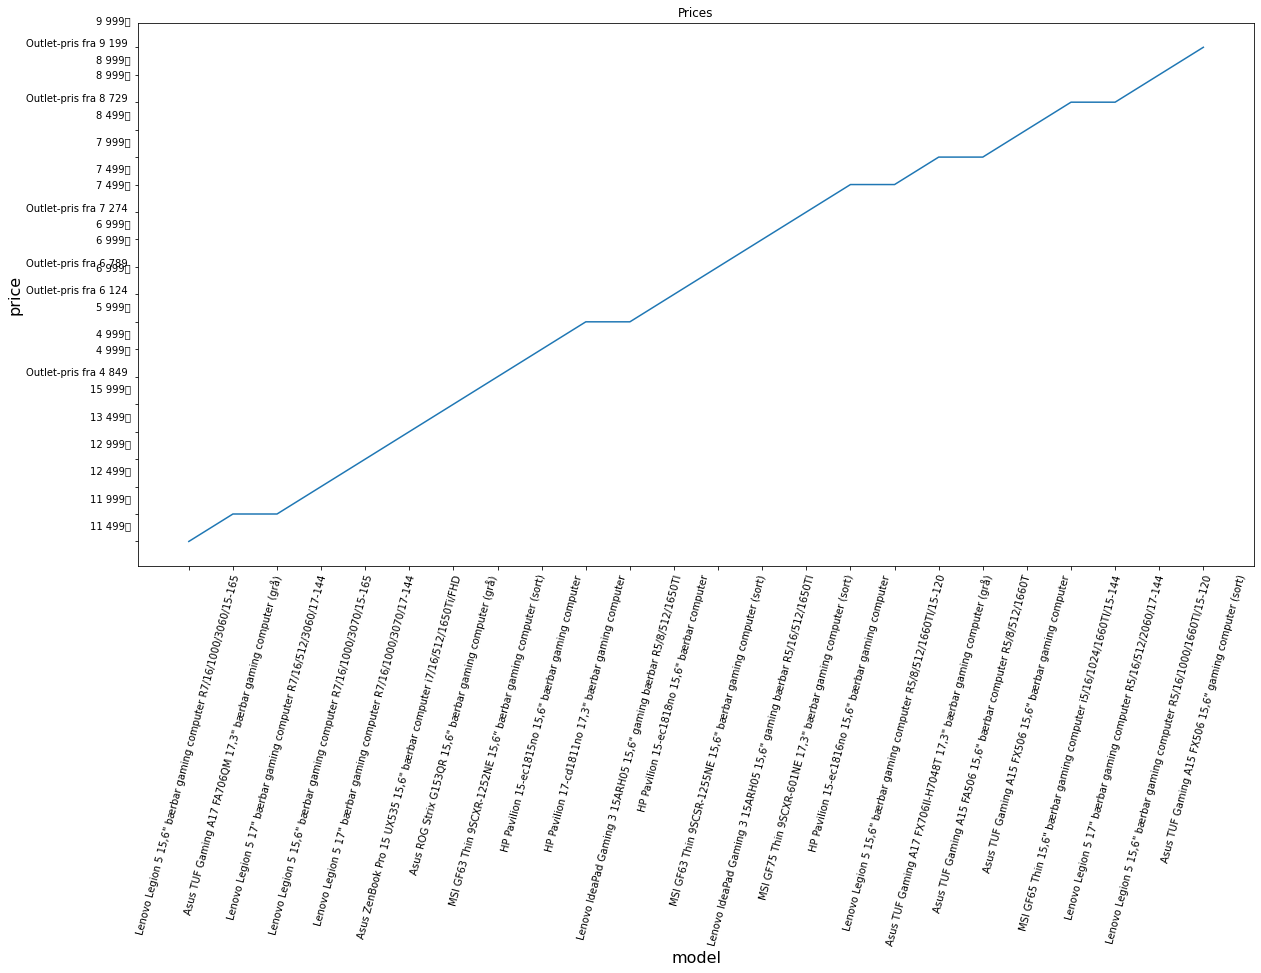

In [39]:
#Use the data from Exercise 2, to make a sorted bar chart of the laptops, where x-axis is names, and y-axis is price.
import matplotlib.pyplot as plt


sorted_dict = {k: v for k, v in sorted(both.items(), key=lambda item: item[1])}

x = list(sorted_dict.keys())
y = list(sorted_dict.values())
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)

plt.title("Prices", fontsize=12)
plt.xlabel("model", fontsize=16)
plt.ylabel("price", fontsize=16)

plt.plot(x,y)